In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_c11_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          8.1447 ( 7.6958,  8.3274) ( 7.7967,  8.3378)  0.5411 (Jnode 106)\n',
 't_n56          8.0572 ( 7.6011,  8.2974) ( 7.6913,  8.3232)  0.6319 (Jnode 105)\n',
 't_n57          7.6806 ( 7.2538,  7.9486) ( 7.3189,  7.9825)  0.6637 (Jnode 104)\n',
 't_n58          6.8387 ( 6.4419,  7.1703) ( 6.4706,  7.1882)  0.7176 (Jnode 103)\n',
 't_n59          6.6538 ( 6.2690,  6.9897) ( 6.2972,  7.0149)  0.7177 (Jnode 102)\n',
 't_n60          6.4085 ( 6.0290,  6.7497) ( 6.0371,  6.7557)  0.7185 (Jnode 101)\n',
 't_n61          6.0499 ( 5.6704,  6.4075) ( 5.6945,  6.4312)  0.7367 (Jnode 100)\n',
 't_n62          3.1050 ( 1.8292,  4.1193) ( 1.8856,  4.1654)  2.2798 (Jnode 99)\n',
 't_n63          4.6611 ( 4.3425,  5.0573) ( 4.3220,  5.0269)  0.7049 (Jnode 98)\n',
 't_n64          3.5047 ( 2.8915,  4.0653) ( 2.9016,  4.0711)  1.1695 (Jnode 97)\n',
 't_n65          3.0967 ( 2.4679,  3.7091) ( 2.4848,  3.7227)  1.2378 (Jnode 96)\n',
 't_n66          2.4067 ( 1.8325,  3.0249) ( 1.8211,  3.01

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[8.1447,
 8.0572,
 7.6806,
 6.8387,
 6.6538,
 6.4085,
 6.0499,
 3.105,
 4.6611,
 3.5047,
 3.0967,
 2.4067,
 1.616,
 1.0705,
 0.4595,
 3.6603,
 6.512,
 6.2772,
 6.0118,
 4.4589,
 4.0312,
 3.8116,
 6.368,
 6.1052,
 5.9316,
 5.6044,
 5.2169,
 5.0878,
 4.5065,
 4.1292,
 3.8085,
 2.8505,
 2.6083,
 4.5511,
 3.7811,
 6.2702,
 1.3251,
 6.1401,
 5.7944,
 5.2415,
 4.8929,
 3.7676,
 4.1589,
 5.0527,
 4.8838,
 4.5362,
 3.5559,
 4.3636,
 7.0859,
 5.553,
 3.7253,
 2.9341,
 5.4731]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_c11_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[8.2126,
 8.1459,
 7.5902,
 6.8374,
 6.578,
 6.2535,
 5.7854,
 3.3753,
 4.5932,
 3.4869,
 2.9768,
 2.2489,
 1.488,
 0.9797,
 0.4233,
 3.6312,
 6.2924,
 5.3229,
 5.7347,
 4.4041,
 3.8239,
 3.8127,
 6.3379,
 5.9854,
 5.7306,
 5.4056,
 4.9911,
 4.77,
 4.1689,
 3.7393,
 3.321,
 2.4907,
 2.1167,
 4.3125,
 3.5018,
 6.1616,
 1.7235,
 5.9629,
 5.5611,
 4.9628,
 4.5399,
 3.5036,
 3.6866,
 4.8304,
 4.469,
 3.8628,
 3.4864,
 4.1923,
 6.9753,
 5.5898,
 3.7919,
 3.6441,
 6.0905]

In [12]:
posterior_mean_iqtree

[8.1447,
 8.0572,
 7.6806,
 6.8387,
 6.6538,
 6.4085,
 6.0499,
 3.105,
 4.6611,
 3.5047,
 3.0967,
 2.4067,
 1.616,
 1.0705,
 0.4595,
 3.6603,
 6.512,
 6.2772,
 6.0118,
 4.4589,
 4.0312,
 3.8116,
 6.368,
 6.1052,
 5.9316,
 5.6044,
 5.2169,
 5.0878,
 4.5065,
 4.1292,
 3.8085,
 2.8505,
 2.6083,
 4.5511,
 3.7811,
 6.2702,
 1.3251,
 6.1401,
 5.7944,
 5.2415,
 4.8929,
 3.7676,
 4.1589,
 5.0527,
 4.8838,
 4.5362,
 3.5559,
 4.3636,
 7.0859,
 5.553,
 3.7253,
 2.9341,
 5.4731]

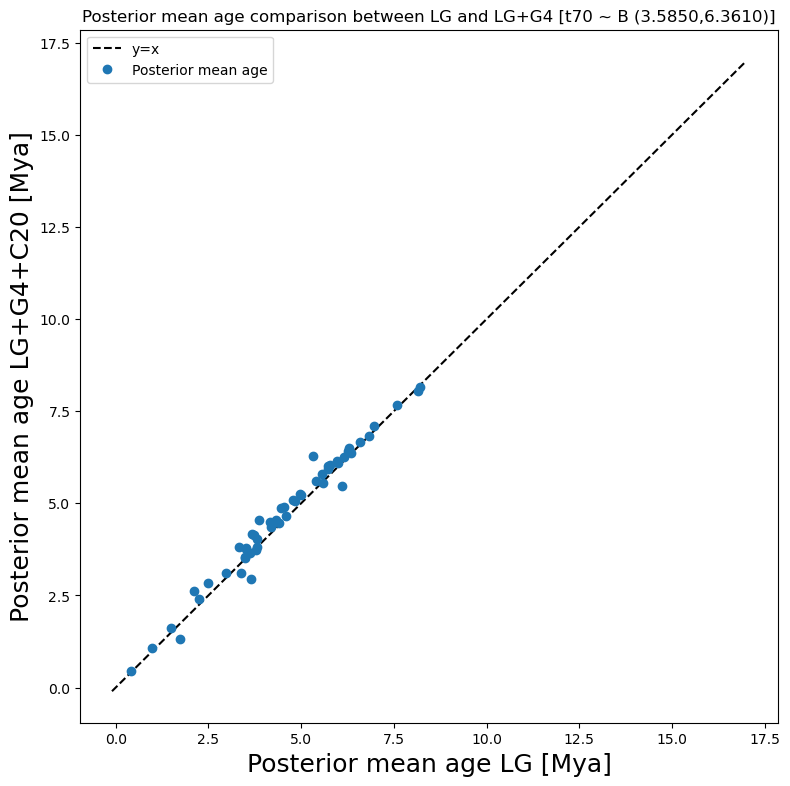

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t70 ~ B (3.5850,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('metazoa_posterior_mean_age_comparison_LG_G4_C20_c11_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')